# Image numérique
 
L'image est devenue fondamentale pour la communication. L'image suivante correspond à un lancement de fusée de type *Falcon Heavy*, elle a été prise sur le même lieu que nous allons étudier mais sans doute a un autre moment. Elle correspond néanmoins à la fenêtre de tir de la fusée qui sera considérée ensuite. Est-ce possible de savoir s'il s'agit de la même fusée ? Est ce que l'entreprise à du lancer deux fusées l'une après l'autre à *moins de 3 semaines* après le lancement de la première ? Tout cela répond aux besoins d'investigation que nous sommes de plus en plus confrontés avec des images qui sont facilement manipulables.

<p><img src="./spacex_pub.jpg" alt="Promotion pour SpaceX" /></p>

## Considérations génerales

 L'ordinateur traite les images comme des mosaiques de carrés contigus, c'est a dire mis l'un à côté de l'autre, pour remplir un tableau (aussi appellé *matrice*). Ces carrés peuvent être identifiés grâce à leur position décrité par leur numéro de ligne et leur numéro de colonne.
En plus ce cette indication on attribue à chaque élément de cette mosaique un code de 3 octets pour identifier la couleur. On pourait appeller ce code de couleur le code "Rouge-Vert-Bleu" mais le terme approprié est  <code class="highlighter-rouge">RGB</code> de l'anglais *Red-Green-Blue*. Un octet c'est $2^8$ bits cela correspond à un chiffre compris entre 0 et 255.

Vue de loin les pixels forment des images, mais si on se rapproche elles correspondent simplement à quelques sources lumineuses qui sont allumés **ON** ou éteintes **OFF**.

Chaque point est (appellé *pixel*). Le pixel est la plus petite unité d'information qui consitue l'image. 

In [1]:
# L'execution de cette cellule est fondamentale pour 
# incorposer les images à votre trace écrite
%matplotlib inline

# Mise en activité

Ici nous allons travailler quelques notion fondamentales en analyse d'image à l'aide des modules <code class="highlighter-rouge">Numpy</code> et des librairies simples qui permettent la lecture et l'ecriture d'images comme, <code class="highlighter-rouge">imageio</code> , nous nous servirons égualement de la sous-librairie <code class="highlighter-rouge">matplotlib.pyplot</code> pour représenter les images comme des tableau, ou matrices de points, ce qui sera plus pratique pour accéder aux coordonées de chaque pixel.


In [2]:
# Cette cellule charge les modules nécessaires
import imageio
import numpy as np
import matplotlib.pyplot as plt

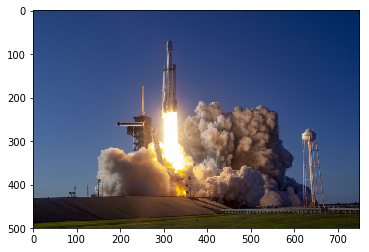

In [3]:
im = imageio.imread('spacex_petit.jpg')
plt.imshow(im)

## 1) Caractéristiques d'une image

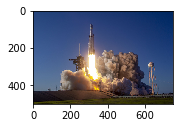

In [4]:
# On va d'abord rajouter une instruction pour 
# réduire la taille de l'image
plt.figure(figsize = (2.5,2.5))
plt.imshow(im)

In [5]:
# L'image fait toujours la même taille
# le fait d'avoir rappetissé son affichage
# n'a pas changé sa taille
# 
# La commande suivante devrait faire apparaitre :
# (Nombre de LIGNES, Nombre de COLONNES, Code RGB)
im.shape

(500, 750, 3)

Ici <code class="highlighter-rouge">im</code> est l'image qui à étée importée et <code class="highlighter-rouge">im.shape</code> est la methode qui extrait l'information de l'objet <code class="highlighter-rouge">im</code>. On peut mettre cela en forme de la façon suivante :

In [6]:
print("Type de l'image :" , type(im))
print()
print("Format de l'image : {}".format(im.shape))
print("Hauteur de l'image : {}".format(im.shape[0]))
print("Largeur de l'image : {}".format(im.shape[1]))
print("Dimension de l'image : {}".format(im.ndim))

Type de l'image : <class 'imageio.core.util.Array'>

Format de l'image : (500, 750, 3)
Hauteur de l'image : 500
Largeur de l'image : 750
Dimension de l'image : 3


In [7]:
# D'autres "méthodes" associées à l'objet "im" sont possibles; 
# Par exemple, si je veux obtennir les informations EXIF de l'image
im.meta

Dict([('jfif', 257),
      ('jfif_version', (1, 1)),
      ('dpi', (300, 300)),
      ('jfif_unit', 1),
      ('jfif_density', (300, 300)),
      ('exif',
       b'Exif\x00\x00II*\x00\x08\x00\x00\x00\t\x00\x0f\x01\x02\x00\x06\x00\x00\x00z\x00\x00\x00\x10\x01\x02\x00\x0e\x00\x00\x00\x80\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\x8e\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\x96\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00"\x00\x00\x00\x9e\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xc0\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xd4\x00\x00\x00(\x03\x00\x00Canon\x00Canon EOS 60D\x00,\x01\x00\x00\x01\x00\x00\x00,\x01\x00\x00\x01\x00\x00\x00Adobe Photoshop CC 2019 (Windows)\x002019:04:12 10:40:28\x00!\x00\x9a\x82\x05\x00\x01\x00\x00\x00f\x02\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00n\x02\x00\x00"\x88\x03\x00\x01\x00\x00\x00\x03\x00\x00\x00\'\x88\x03\x00\x01\x00\x00\x00\xc8\x00\x00\x000\x88\x03\x00\x01\x00\x00\x00\x02\x00\

In [8]:
# Encore une"méthodes" associées à l'objet "im" pour calculer sa taille
print("Taille de l'image est de {} bits".format(im.size))

Taille de l'image est de 1125000 bits


In [9]:
# On peut vérifier :
500*750*3

1125000

Cela est beaucoup plus grand que la taille de l'image sur le disque qui ne dépasse pas 95 kB on en déduit que l'image est en fait compressée.

### Exercice 

En compulsant la liste d'informations : trouvez la date création de cette image. Sachant que le premier décolage d'une fusée *Falcon Heavy* de l'entreprise SpaceX à eu lieu le 6 février 2018, comment savoir si la fusée qui se trouve sur cette image correspond elle bien au lancement effectué en avril 2019 ?

## 2) Extraire les couleurs d'une image

Nous allons d'abord selectionner un pixel spécifique et lui demander sa composition RGB.

In [10]:
# Afficher le pixel en haut à gauche
# Sur 3 octets ente 0 et 255 
# RVB
im[(0,0)]

Array([ 35,  68, 122], dtype=uint8)

In [11]:
'''
Pour un point lumineux au milieu de l'image, situé au niveau de 
la 310 ème ligne (axe des ordonnées) et la 300 ème colonne (axe des abscisses) 
Pour voire la valeur codée en Rouge - Vert - Bleu
'''
im[ 310, 300 ]


Array([253, 253, 253], dtype=uint8)

Dans ce cas R = 253 ; G = 253 ; B = 253, et nous nous rendons compte que ce pixel est particulièrement LUMINEUX. 

Nous pouvons aussi choisir un de des cannaux spécifiquement et nous allons voire que le point central est lumineux dans chacun de ses canaux

- index 0 : valeur pour le canal ROUGE
- index 1 : valeur pour le canal VERT
- index 2 : valeur pour le canal BLEU

In [12]:
# On peut se demander 
print('Maximum de la valeur RGB de cette image est {}'.format(im.max()))
print('Minimum de la valeur RGB de cette image est {}'.format(im.min()))

Maximum de la valeur RGB de cette image est 255
Minimum de la valeur RGB de cette image est 0


In [13]:
# Misse des VERTS à 0
# Pour obtennir une image en ROUGE et BLEU
im[:, :, 1] = 0

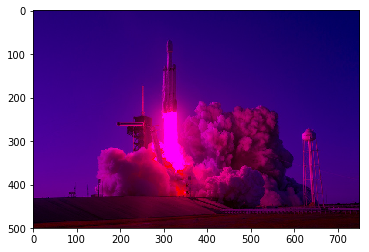

In [14]:
plt.imshow(im)

In [15]:
# On va recopier la matrice et 
nb=im[:, :, 0]
nb.max()

255

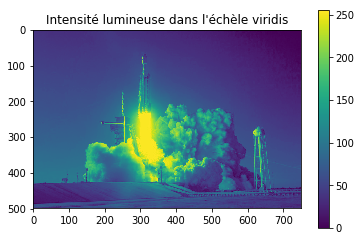

In [16]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title("Intensité lumineuse dans l'échèle viridis")
pcm = ax.pcolormesh(nb,cmap='viridis')
fig.colorbar(pcm)
plt.imshow(nb)

On vient de d'associer à chaque pixel une valeur comprise entre 0 et 255, on a perdu l'information RGB, mais on peut maintenant enregistrer cette image en niveau de gris.

In [17]:
# On Sauvegarde l'image en noir et blanc
imageio.imwrite('./spacex_gris.jpg', im[:, :, 0])
# et on utilise la cellule suivante pour visualiser cette image

Voila finalement l'image codée sur 256 niveaux sur un seul canal

<p><img src="./spacex_gris.jpg" alt="niveau de Gris" /></p>

## 3) Manipulation des couleurs sur une image

Nous avons vu comment extraire les couleurs, mais il est possible également de les imposer en manipulant l'image. 

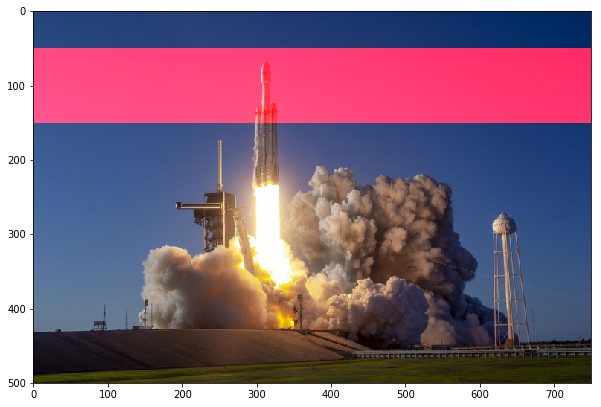

In [20]:

pic = imageio.imread('./spacex_petit.jpg')
# On selectionne les lignes comprises entre 50 et 150 
# On choisit le canal '0' qui correspond au rouge et on impose 255 pour les rouges
pic[50:150 , : , 0] = 255 # Maximum d'intensité pour les rouges
plt.figure( figsize = (10,10))
plt.imshow(pic)
plt.show()

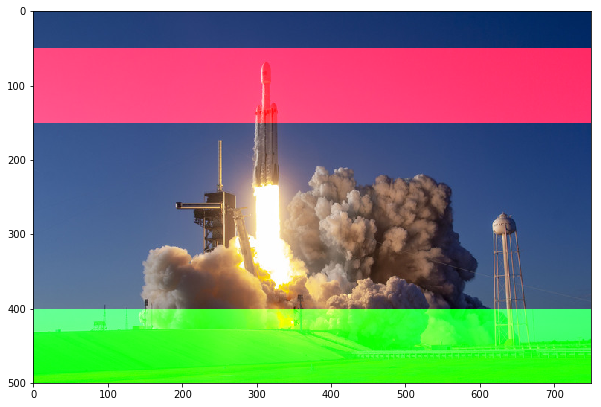

In [21]:
#On sélectionne maintenant le bas de l'image et on force le vert
pic[400:500 , : , 1] = 255 # Maximum G channel
plt.figure( figsize = (10,10))
plt.imshow(pic)
plt.show()

### Exercice
Saturer en bleu les lignes 200 à 300

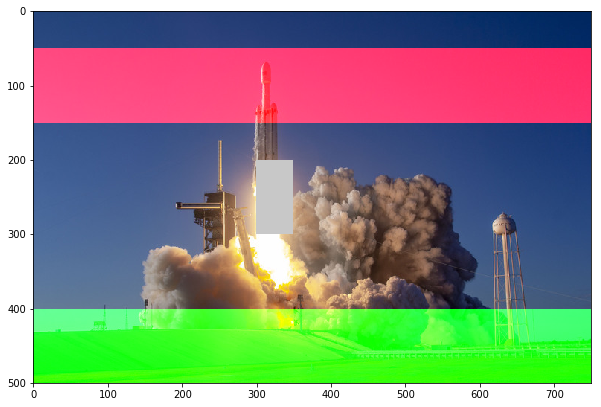

In [22]:
# Impose une valeur de 200 pour tous les cannaux ce qui permet d'avoir une boite grise uniforme
pic[200:300 , 300:350 , [0,1,2] ] = 200 
plt.figure( figsize = (10,10))
plt.imshow(pic)
plt.show()


## 4) Extraction des masques d'une image

Maintenant que nous savons que chaque pixel de l'image peut se représenter comme un triplet de nombres entiers essayons de séparer les trois cannaux de l'image.

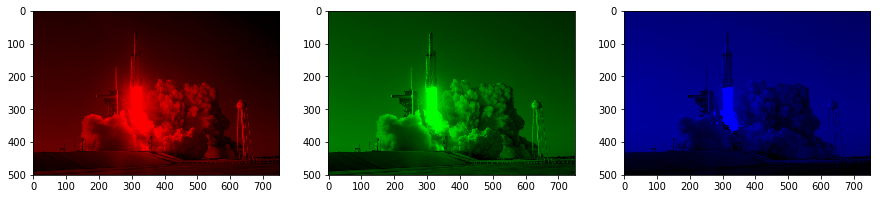

In [23]:
pic = imageio.imread('./spacex_petit.jpg')

fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

## 5) L'échelle de gris

Nous avons vu une image en noir et blanc, puis trois canaux différents (RGB). La combinaison de ces trois couleurs à tendance à mettre en évidence la plus grande valeur parmi elles. Comme chacune des valeurs du RGB avait 256 différent niveaux d'intensité, la combinaison des 3 permetrait théoriquement d'avoir <strong>16.8</strong> millions de nuances, d'où l'impression de "détail" qui est rendue par la photo en noir et blanc. Dans la pratique l'œil humain n'est pas capable de distinguer autant de niveaux de luminosité, il faut donc utiliser une stratégie pour exploiter au mieux une image qui a souvant été enregistrée avec un capteur beaucoup plus sensible que l'œil nu. 

Les images en noir et blanc sont stockées dans des tableaux bidimensionnels. Il y a trois types d'images en noir et blanc :

- Binaire : soit blanc soit noir  <code class="highlighter-rouge">0</code> ou <code class="highlighter-rouge">255</code></li>
- Echèle de Gris : on prend une valeur compise entre  <code class="highlighter-rouge">0</code> et <code class="highlighter-rouge">255</code></li>
- Obtennue en jouant sur la clarté et le contraste : on prends plusieurs intervales entre <code class="highlighter-rouge">0</code> et <code class="highlighter-rouge">255</code></li> mais en choisissant un fenétrage adapté à la visualisation d'un objet particulier, c'est ce qui se fait en imagerie médicale.

La façon la plus simple consiste à utiliser cette [formule](https://fr.wikipedia.org/wiki/Niveau_de_gris) : 
$$ Y_{L} = 0,2126 \times Rouge + 0,7152 \times Vert + 0,0722 \times Bleu$$

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


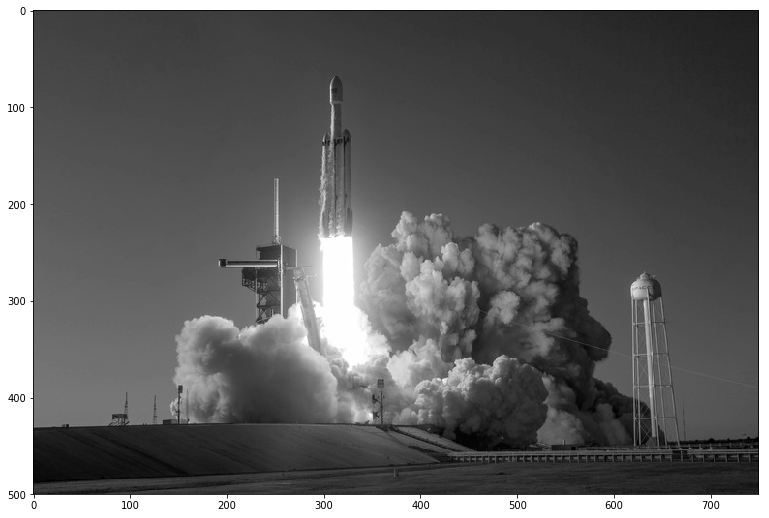

In [26]:
pic = imageio.imread('./spacex_petit.jpg')

gris = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gris = gris(pic)  

plt.figure( figsize = (13,13))
plt.imshow(gris, cmap = plt.get_cmap(name = 'gray'))
imageio.imwrite('./spacex_gris2.jpg', gris)
plt.show()

On peut comparer les deux images, sur la dernière le logo de SpaceX est clairement visible, alors que l'image enregistrée et comprimée de la celule 17 rend ce détail invisible.